# Aprendizaje automático


Tema: Salarios IT

+Sigrid Segura
+Víctor Garro Abarca 

# INDICE DE CONTENIDOS
En particular en este proyecto final se llevan a cabo las tareas de :  

0.   Conjuto de Datos

1.   Pre-procesado : Salarios en FAANG
*   1.1 Información del Dataframe
*   1.2 Cambio de Tipo de Datos para Fechas y Salario Base
*   1.3 Eliminación de Columnas no relevantes
*   1.4 Creación Columnas de clasificación FAANG y RangoSalarial
*   1.5 Ajuste de Valores Nulos
*   1.6 Ajuste Valores Duplicados
*   1.7 Filtramos por la columna FAANG (Subconjunto de Análisis de ahora en adelante)

2.   Análisis Exploratorio de Datos EDA: Salarios en FAANG
*   2.1 Histogramas sobre SalarioBase y sobre AñosExperiencia
*   2.2 Análisis de Simetría / Asimetria / Curtosis
*   2.3 Análisis de variables categóricas
*   +2.3.1 Hallazgos sobre posiciones y compañias
*   +2.3.2 Visualización de Variables
*   2.4 Análisis Multivariable
*   +2.4.1 Matriz Correlación
*   +2.4.2 Mapa de Calor clásico
*   +2.4.3 Mapa de Calor R cuadrado
*   +2.4.4 Diagrama de Dispersión (scatterplot)
*   +2.4.5 Diagrama de Dispersión (lmplot)
*   +2.4.6 Diagrama de Dispersión (swarmplot)
*   +2.4.7 Distribución de Salarios por Categorias
*   +2.4.8 Análisis de Nube de Palabras

3.   Modelo de aprendizaje (construcción y validación)
*   3.1. Modelado de Regresión Lineal LR [versión 1]
*   3.2 Modelado de Regresión Lineal LR [versión 2]
*   3.3 Modelado con Arbol de Decisión DT
*   3.4 Modelado Random Forest (RF)
*   3.5 Modelado con KNN

4.  Métricas
*   4.1 Métricas de REGRESION
*   +4.1.1 Configuración y entrenamiento
*   +4.1.2 Error absoluto medio
*   +4.1.3 Error medio cuadrado
*   +4.1.4 Cálculo del valor R cuadrado
*   +4.1.5 Desviación cuadrática media de la raíz

*   4.2 Métricas de CLASIFICACION
*   +4.2.1 Matriz de Confusion
*   +4.2.2 Accuracy / Exactitud
*   +4.2.3 Precisión
*   +4.2.4 Recall / Sensibilidad


-------------------------------------------------------

# 0. Conjunto de Datos

En este trabajo se ha seleccionado un conjunto de datos (dataset) específico que es el resultado de aplicar una encuesta digital masiva entre profesionales de TI,  denominada Salarios y Puestos publicado en el Portal "Levels.fyi" y en particular una versión restringida a FAANG ((Empresas : Facebook, Amazon,  Apple, Netflix, Google.  


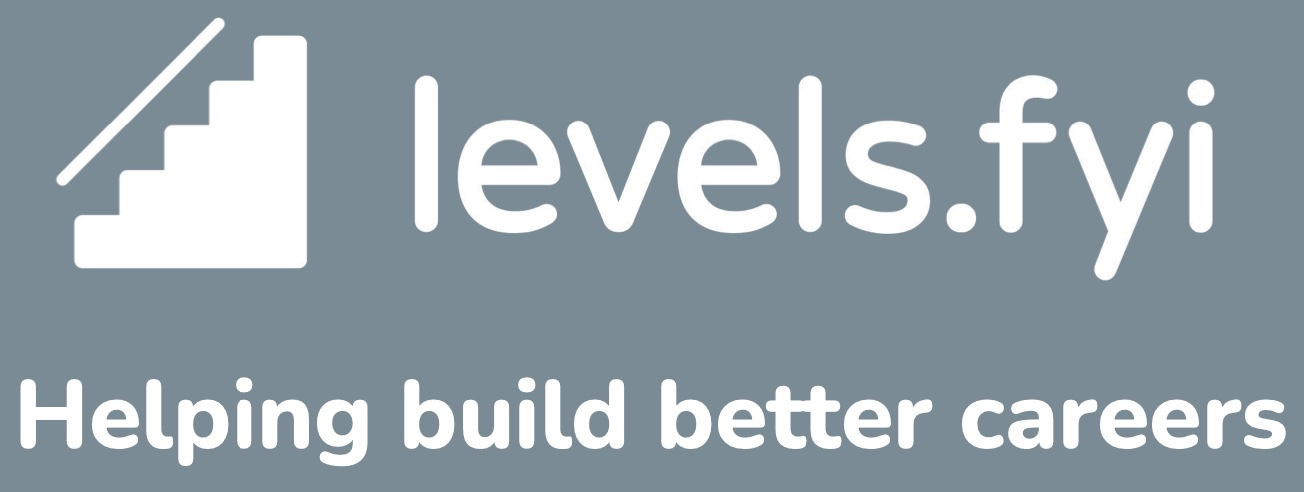

## 0.1 Carga de Datos de la fuente

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("https://s3.amazonaws.com/courses.crehana/attachments/courses/attachments-files/6036cbee/levels_fyi_salary_data.csv")
df.head()


timestamp    company level                         title  \
0   6/7/2017 11:33:27     Oracle    L3               Product Manager   
1  6/10/2017 17:11:29       eBay  SE 2             Software Engineer   
2  6/11/2017 14:53:57     Amazon    L7               Product Manager   
3   6/17/2017 0:23:14      Apple    M1  Software Engineering Manager   
4  6/20/2017 10:58:51  Microsoft    60             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   127000   Redwood City, CA                1.5   
1                   100000  San Francisco, CA                5.0   
2                   310000        Seattle, WA                8.0   
3                   372000      Sunnyvale, CA                7.0   
4                   157000  Mountain View, CA                5.0   

   yearsatcompany  tag  basesalary  ...  Doctorate_Degree  Highschool  \
0             1.5  NaN    107000.0  ...                 0           0   
1             3.0  NaN         0.0  ...                 0           0   
2             0.0  NaN    155000.0  ...                 0           0   
3             5.0  NaN    157000.0  ...                 0           0   
4             3.0  NaN         0.0  ...                 0           0   

  Some_College Race_Asian  Race_White  Race_Two_Or_More  Race_Black  \
0            0          0           0                 0           0   
1            0          0           0                 0           0   
2            0          0           0                 0           0   
3            0          0           0                 0           0   
4            0          0           0                 0           0   

   Race_Hispanic  Race  Education  
0              0   NaN        NaN  
1              0   NaN        NaN  
2              0   NaN        NaN  
3              0   NaN        NaN  
4              0   NaN        NaN  

[5 rows x 29 columns]


#1. Preprocesado :  Salarios en FAANG

Las labores que se llevan a cabo, son las necesarias para corregir los problemas de “suciedad” que tiene el conjunto datos. La notebook, comenta lo correspodiente a nivel de código y además se explica el procedimiento.

##1.1 Información del Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

##1.2 Cambio de Tipo de Datos para Fechas y Salario Base

In [ ]:
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['basesalary'] =  df['basesalary'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                62642 non-null  datetime64[ns]
 1   company                  62637 non-null  object        
 2   level                    62523 non-null  object        
 3   title                    62642 non-null  object        
 4   totalyearlycompensation  62642 non-null  int64         
 5   location                 62642 non-null  object        
 6   yearsofexperience        62642 non-null  float64       
 7   yearsatcompany           62642 non-null  float64       
 8   tag                      61788 non-null  object        
 9   basesalary               62642 non-null  int64         
 10  stockgrantvalue          62642 non-null  float64       
 11  bonus                    62642 non-null  float64       
 12  gender                   43102 n

##1.3 Eliminación de Columnas no relevantes

In [ ]:
df.drop(['rowNumber','dmaid','cityid','Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College'], axis=1, inplace=True)

In [ ]:
df.dtypes

timestamp                  datetime64[ns]
company                            object
level                              object
title                              object
totalyearlycompensation             int64
location                           object
yearsofexperience                 float64
yearsatcompany                    float64
tag                                object
basesalary                          int64
stockgrantvalue                   float64
bonus                             float64
gender                             object
otherdetails                       object
Race_Asian                          int64
Race_White                          int64
Race_Two_Or_More                    int64
Race_Black                          int64
Race_Hispanic                       int64
Race                               object
Education                          object
dtype: object

In [ ]:
len(df.otherdetails.unique())

12842

In [ ]:
#we drop otherdetails as it needs text analysis
df = df.drop(columns= ['otherdetails'])

In [ ]:
df.shape

(62642, 20)

In [ ]:
df = df.dropna(subset = ['level', 'tag', 'company'])

In [ ]:
df['timestamp_month'] = pd.DatetimeIndex(df['timestamp']).month
df['timestamp_year'] = pd.DatetimeIndex(df['timestamp']).year
#take data from the whole datetime
df['datestamp']= pd.to_datetime(df['timestamp'], errors='coerce')
timerank = df.datestamp.drop_duplicates().sort_values().reset_index().reset_index()[['level_0','datestamp']]
df = df.merge(timerank).rename(columns = {'level_0': 'dateranking'})
df = df.drop(columns = ['datestamp', 'timestamp'])
df.isna().sum()

company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                            0
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     18985
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       39314
Education                  31390
timestamp_month                0
timestamp_year                 0
dateranking                    0
dtype: int64

In [ ]:
df = df.join(pd.get_dummies(df[['gender', 'Education']], drop_first=True ) )

In [ ]:
df = df.join(pd.get_dummies(df.title, drop_first=True))

In [ ]:
df.head()

company                  level                         title  \
0     Yahoo                    IC2             Software Engineer   
1    Oracle                     M3  Software Engineering Manager   
2  Qualcomm  Senior Staff Engineer             Software Engineer   
3    Splunk                     P2             Software Engineer   
4    Google                     L3             Software Engineer   

   totalyearlycompensation           location  yearsofexperience  \
0                   160500      Sunnyvale, CA               0.58   
1                   340000   Redwood City, CA              16.00   
2                   240000    Santa Clara, CA              15.00   
3                   160000        Seattle, WA               5.00   
4                   208000  Mountain View, CA               0.00   

   yearsatcompany                             tag  basesalary  \
0            0.58                      Full Stack      128000   
1           15.00  Distributed Systems (Back-End)      206000   
2            6.00                Embedded Systems           0   
3            3.00                      Full Stack           0   
4            0.00  Distributed Systems (Back-End)      116000   

   stockgrantvalue  ...  Marketing Mechanical Engineer  Product Designer  \
0          13000.0  ...          0                   0                 0   
1         134000.0  ...          0                   0                 0   
2              0.0  ...          0                   0                 0   
3              0.0  ...          0                   0                 0   
4          65000.0  ...          0                   0                 0   

   Product Manager  Recruiter  Sales  Software Engineer  \
0                0          0      0                  1   
1                0          0      0                  0   
2                0          0      0                  1   
3                0          0      0                  1   
4                0          0      0                  1   

  Software Engineering Manager Solution Architect  Technical Program Manager  
0                            0                  0                          0  
1                            1                  0                          0  
2                            0                  0                          0  
3                            0                  0                          0  
4                            0                  0                          0  

[5 rows x 43 columns]

In [ ]:
#for Countries
df['country'] = df.location.str.split(pat=',').apply(lambda x:x[-1][1:])
df.country.unique()
df.country.value_counts().head(6)
df.loc[ df.country.str.len() == 2,'country'] = 'US'
df = df.join(pd.get_dummies(df.country)[['US', 'India', 'Canada', 'United Kingdom', 'Germany']])


In [ ]:
#levelling based on salary
df_level = df.groupby('level')['basesalary'].median().reset_index()

df_level.columns = ['level', 'avgerage_salary']
df = df.merge(df_level)

In [ ]:
common_location = df.value_counts('location').head(10).reset_index().location.to_list()
common_location

['Seattle, WA',
 'San Francisco, CA',
 'New York, NY',
 'Redmond, WA',
 'Mountain View, CA',
 'Sunnyvale, CA',
 'San Jose, CA',
 'Austin, TX',
 'Menlo Park, CA',
 'Cupertino, CA']

In [ ]:
df = df.join(pd.get_dummies(df.loc[df.location.isin(common_location), 'location'] ) )

In [ ]:
df.common_location = df[common_location].fillna(0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
df_cmp_comp = df.groupby('company')['basesalary'].median().reset_index()
df_cmp_comp

df_cmp_comp.columns = ['company', 'company_comp']
df = df.merge(df_cmp_comp)

In [ ]:
#yoe ratio
df['years_ratio'] = 0
df.loc[ df.yearsofexperience >0 ,'years_ratio'] = df.yearsatcompany/df.yearsofexperience

In [ ]:
df.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'timestamp_month', 'timestamp_year', 'dateranking', 'gender_Male',
       'gender_Other', 'gender_Title: Senior Software Engineer',
       'Education_Highschool', 'Education_Master's Degree', 'Education_PhD',
       'Education_Some College', 'Data Scientist', 'Hardware Engineer',
       'Human Resources', 'Management Consultant', 'Marketing',
       'Mechanical Engineer', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'country', 'US', 'India', 'Canada',
       'United Kingdom', 'Germany', 'avgerage_salary', 'Austin, TX',
       'Cupertino, CA', 'Menlo Pa

##1.4 Creación Columnas de clasificación FAANG y RangoSalarial

In [ ]:
def rangesalary_classifier(money):
  if money>=0 and money<50000:
    return 1
  else:
    if money>=50000 and money<250000:
      return 2
    else: 
      if money>=250000 and money<750000:
        return 3
      else:
          if money>=750000 :
            return 4


In [ ]:
df['rangesalary'] = df['basesalary'].apply(lambda x: rangesalary_classifier(x))

df.head()

company level              title  totalyearlycompensation       location  \
0   Yahoo   IC2  Software Engineer                   160500  Sunnyvale, CA   
1   Yahoo   IC2  Software Engineer                   135000   New York, NY   
2   Yahoo   IC2  Software Engineer                   148000  Sunnyvale, CA   
3   Yahoo   IC2  Software Engineer                   130000  Champaign, IL   
4   Yahoo   IC2  Software Engineer                   174000  Sunnyvale, CA   

   yearsofexperience  yearsatcompany                             tag  \
0               0.58            0.58                      Full Stack   
1               2.00            1.00                         ML / AI   
2               1.00            1.00  Distributed Systems (Back-End)   
3               2.00            1.00  Distributed Systems (Back-End)   
4               1.00            0.00      API Development (Back-End)   

   basesalary  stockgrantvalue  ...  Mountain View, CA New York, NY  \
0      128000          13000.0  ...                0.0          0.0   
1      110000          15000.0  ...                0.0          1.0   
2      120000          10000.0  ...                0.0          0.0   
3      113000          10000.0  ...                NaN          NaN   
4      140000          20000.0  ...                0.0          0.0   

   Redmond, WA  San Francisco, CA  San Jose, CA  Seattle, WA  Sunnyvale, CA  \
0          0.0                0.0           0.0          0.0            1.0   
1          0.0                0.0           0.0          0.0            0.0   
2          0.0                0.0           0.0          0.0            1.0   
3          NaN                NaN           NaN          NaN            NaN   
4          0.0                0.0           0.0          0.0            1.0   

  company_comp years_ratio  rangesalary  
0     157000.0         1.0            2  
1     157000.0         0.5            2  
2     157000.0         1.0            2  
3     157000.0         0.5            2  
4     157000.0         0.0            2  

[5 rows x 63 columns]

In [ ]:
def faang_classifier(company):
  faang=['Facebook','Amazon','Apple','Netflix','Google']
  if company in faang:
    return 1
  else:
    return 0

In [ ]:
df['is_faang'] = df['company'].apply(lambda x: faang_classifier(x))

df.head()

company level              title  totalyearlycompensation       location  \
0   Yahoo   IC2  Software Engineer                   160500  Sunnyvale, CA   
1   Yahoo   IC2  Software Engineer                   135000   New York, NY   
2   Yahoo   IC2  Software Engineer                   148000  Sunnyvale, CA   
3   Yahoo   IC2  Software Engineer                   130000  Champaign, IL   
4   Yahoo   IC2  Software Engineer                   174000  Sunnyvale, CA   

   yearsofexperience  yearsatcompany                             tag  \
0               0.58            0.58                      Full Stack   
1               2.00            1.00                         ML / AI   
2               1.00            1.00  Distributed Systems (Back-End)   
3               2.00            1.00  Distributed Systems (Back-End)   
4               1.00            0.00      API Development (Back-End)   

   basesalary  stockgrantvalue  ...  New York, NY Redmond, WA  \
0      128000          13000.0  ...           0.0         0.0   
1      110000          15000.0  ...           1.0         0.0   
2      120000          10000.0  ...           0.0         0.0   
3      113000          10000.0  ...           NaN         NaN   
4      140000          20000.0  ...           0.0         0.0   

   San Francisco, CA  San Jose, CA  Seattle, WA  Sunnyvale, CA  company_comp  \
0                0.0           0.0          0.0            1.0      157000.0   
1                0.0           0.0          0.0            0.0      157000.0   
2                0.0           0.0          0.0            1.0      157000.0   
3                NaN           NaN          NaN            NaN      157000.0   
4                0.0           0.0          0.0            1.0      157000.0   

  years_ratio rangesalary  is_faang  
0         1.0           2         0  
1         0.5           2         0  
2         1.0           2         0  
3         0.5           2         0  
4         0.0           2         0  

[5 rows x 64 columns]

##1.5 Ajuste de Valores Nulos

In [ ]:
df.replace("",np.nan, inplace=True)


In [ ]:
df.isna().sum()

company                        0
level                          0
title                          0
totalyearlycompensation        0
location                       0
                           ...  
Sunnyvale, CA              28698
company_comp                   0
years_ratio                    0
rangesalary                    0
is_faang                       0
Length: 64, dtype: int64

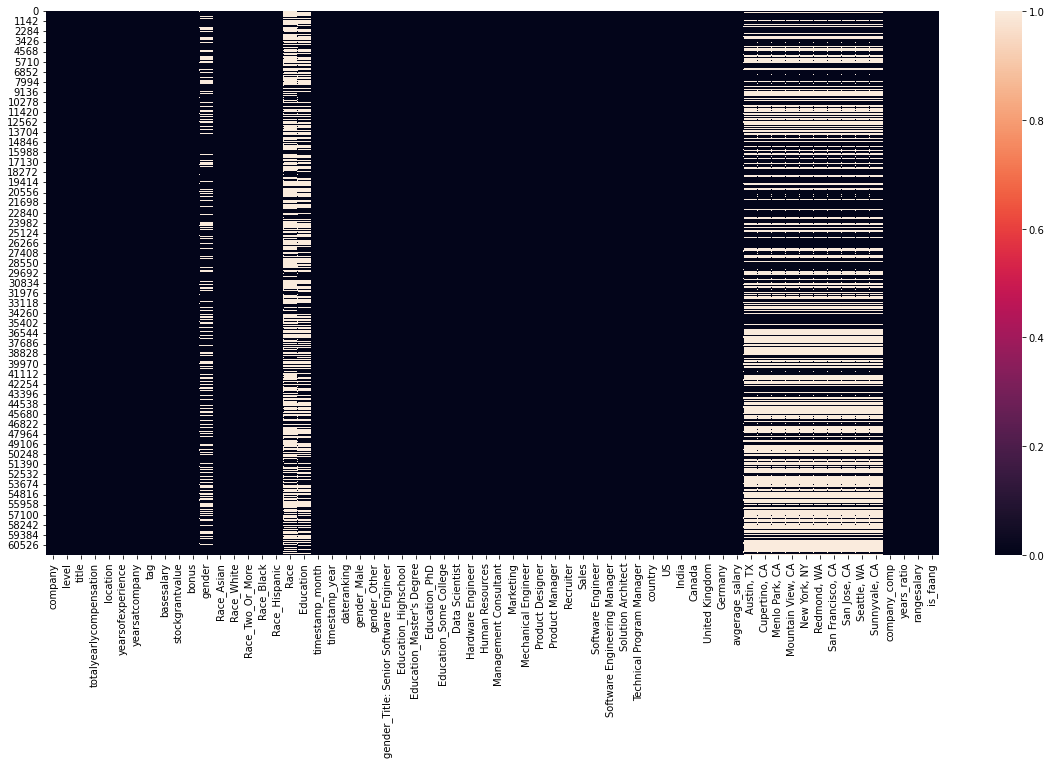

In [ ]:
plt.figure(figsize = (20,10) )
sns.heatmap(df.isna())

In [ ]:
col_numericas=df.select_dtypes(['float64','int64'])
col_categoricas=df.select_dtypes(['object'])

In [ ]:
for col in col_numericas.columns: 
  df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
for col in col_categoricas.columns: 
  df[col].fillna(df[col].mode().values[0], inplace=True)

In [ ]:
df.isna().sum()

company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
                          ..
Sunnyvale, CA              0
company_comp               0
years_ratio                0
rangesalary                0
is_faang                   0
Length: 64, dtype: int64

##1.6 Ajuste Valores Duplicados

In [ ]:
df.duplicated().sum()

44

In [ ]:
df = df.drop_duplicates()

### Ajuste Valores Anormales

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


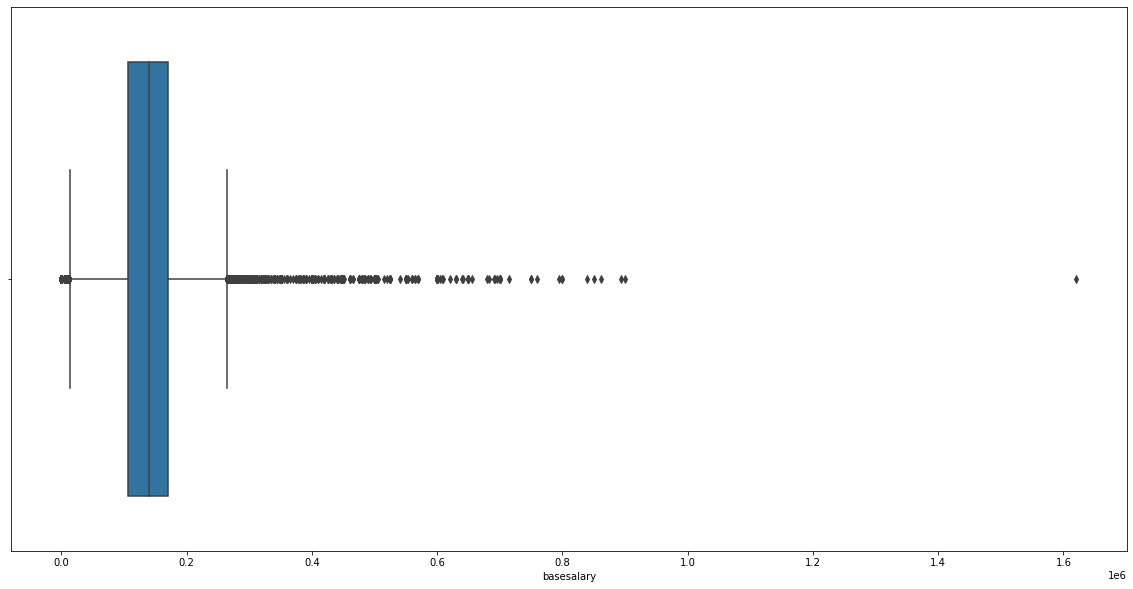

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(df.basesalary)  
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize 
lim_inferior = 0.02
lim_superior = 0.02


In [ ]:
cols_to_winsorize=['basesalary','yearsatcompany', 'yearsofexperience']
for col in cols_to_winsorize:
  df[col] = winsorize(df[col], limits=[lim_inferior, lim_superior])

In [ ]:
df.describe()

totalyearlycompensation  yearsofexperience  yearsatcompany  \
count             6.162300e+04       61623.000000    61623.000000   
mean              2.158491e+05           7.128200        2.628374   
std               1.379642e+05           5.597691        2.929145   
min               1.000000e+04           0.000000        0.000000   
25%               1.350000e+05           3.000000        0.000000   
50%               1.880000e+05           6.000000        2.000000   
75%               2.630000e+05          10.000000        4.000000   
max               4.980000e+06          22.000000       13.000000   

          basesalary  stockgrantvalue           bonus    Race_Asian  \
count   61623.000000     61623.000000    61623.000000  61623.000000   
mean   135126.672768     50925.244783    19279.188205      0.190465   
std     54658.284829     79256.602607    26598.697071      0.392671   
min         0.000000         0.000000        0.000000      0.000000   
25%    107000.000000         0.000000     1000.000000      0.000000   
50%    140000.000000     25000.000000    14000.000000      0.000000   
75%    170000.000000     65000.000000    26000.000000      0.000000   
max    250000.000000   1000000.000000  1000000.000000      1.000000   

         Race_White  Race_Two_Or_More    Race_Black  ...  New York, NY  \
count  61623.000000      61623.000000  61623.000000  ...  61623.000000   
mean       0.129870          0.012982      0.011197  ...      0.136643   
std        0.336163          0.113198      0.105223  ...      0.251096   
min        0.000000          0.000000      0.000000  ...      0.000000   
25%        0.000000          0.000000      0.000000  ...      0.000000   
50%        0.000000          0.000000      0.000000  ...      0.136674   
75%        0.000000          0.000000      0.000000  ...      0.136674   
max        1.000000          1.000000      1.000000  ...      1.000000   

        Redmond, WA  San Francisco, CA  San Jose, CA   Seattle, WA  \
count  61623.000000       61623.000000  61623.000000  61623.000000   
mean       0.077988           0.202120      0.060856      0.256905   
std        0.196057           0.293642      0.174764      0.319455   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.077982           0.202038      0.000000      0.256878   
75%        0.077982           0.202038      0.060875      0.256878   
max        1.000000           1.000000      1.000000      1.000000   

       Sunnyvale, CA   company_comp   years_ratio   rangesalary      is_faang  
count   61623.000000   61623.000000  61623.000000  61623.000000  61623.000000  
mean        0.066561  139379.858170      0.413016      1.942375      0.281534  
std         0.182221   33651.326468      0.395523      0.325039      0.449751  
min         0.000000       0.000000      0.000000      1.000000      0.000000  
25%         0.000000  127000.000000      0.000000      2.000000      0.000000  
50%         0.066578  141000.000000      0.333333      2.000000      0.000000  
75%         0.066578  155000.000000      0.750000      2.000000      1.000000  
max         1.000000  450000.000000      8.000000      4.000000      1.000000  

[8 rows x 55 columns]

##1.7 Filtramos por la columna FAANG (Subconjunto de Análisis de ahora en adelante)

---



In [ ]:
df= df[df['is_faang']==1]

In [ ]:
df.sample(5)

company level                title  totalyearlycompensation  \
1590      Apple  ICT3  Mechanical Engineer                   171000   
33768    Amazon    L4   Solution Architect                    84000   
730       Apple  ICT4    Software Engineer                   216000   
33915    Amazon    L4    Software Engineer                   130000   
6394   Facebook    E4    Software Engineer                   285000   

                         location  yearsofexperience  yearsatcompany  \
1590                Cupertino, CA                5.0             2.0   
33768  London, EN, United Kingdom                1.0             1.0   
730                    Austin, TX               10.0             0.0   
33915       Sydney, NS, Australia                2.0             0.0   
6394                  Seattle, WA                5.0             3.0   

                  tag  basesalary  stockgrantvalue  ...  New York, NY  \
1590   Product Design      144000          15000.0  ...      0.000000   
33768          DevOps       68000          16000.0  ...      0.136674   
730        Full Stack      160000          40000.0  ...      0.000000   
33915      Full Stack      105000          15000.0  ...      0.136674   
6394          ML / AI      162000         100000.0  ...      0.000000   

      Redmond, WA  San Francisco, CA  San Jose, CA  Seattle, WA  \
1590     0.000000           0.000000      0.000000     0.000000   
33768    0.077982           0.202038      0.060875     0.256878   
730      0.000000           0.000000      0.000000     0.000000   
33915    0.077982           0.202038      0.060875     0.256878   
6394     0.000000           0.000000      0.000000     1.000000   

       Sunnyvale, CA  company_comp years_ratio rangesalary  is_faang  
1590        0.000000      160000.0         0.4           2         1  
33768       0.066578      141000.0         1.0           2         1  
730         0.000000      160000.0         0.0           2         1  
33915       0.066578      141000.0         0.0           2         1  
6394        0.000000      170000.0         0.6           2         1  

[5 rows x 64 columns]

# 2. Análisis Exploratorio de Datos :  Salarios en FAANG
Se recurre a a gráficas, tablas etc. para conocer y entender mejor los datos. Se usan las librerías que consideramos oportunas.

##2.1 Histogramas sobre SalarioBase y sobre AñosExperiencia

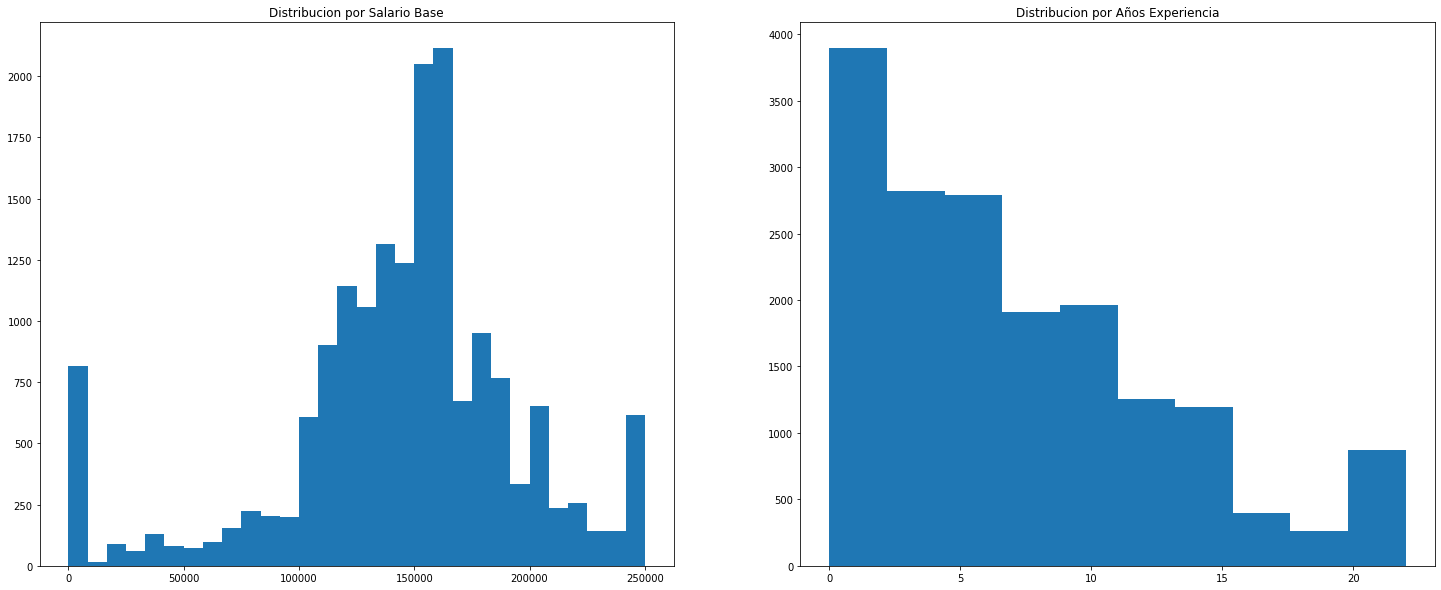

In [ ]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.hist(x=df['basesalary'], bins=30)
plt.title('Distribucion por Salario Base')

plt.subplot(1,2,2,)
plt.hist(x=df['yearsofexperience'], bins = 10)
plt.title('Distribucion por Años Experiencia')

plt.show()

En el histograma de 'Distribución por Salario Base' se muestra que gran parte del salario ronda los $150000 p/y. Asimismo, se nota una particularidad salarial reportada para alrededor de 750 empleados en la induatria.

En ese mismo sentido, en el histograma 'Distribución por Años Experiencia' se muestra el aumento de oferta en el sector TI que van de los 0 a los 5 años de experiencia en la insdutria.

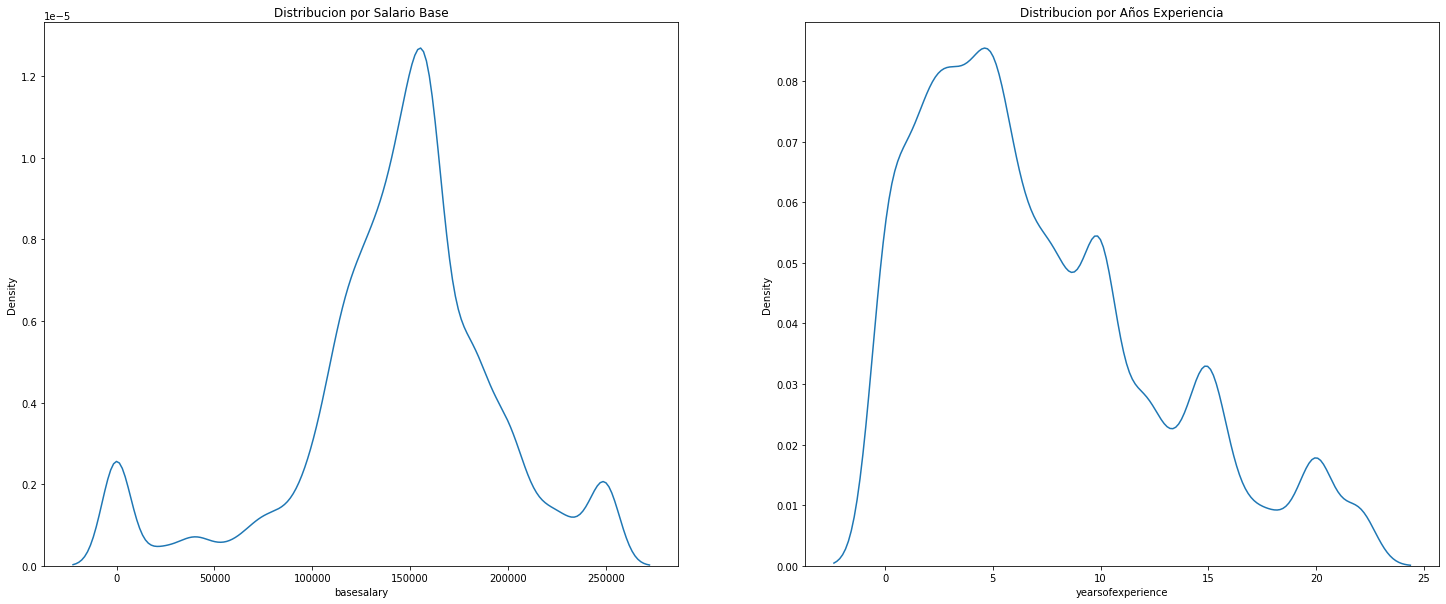

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='basesalary')
plt.title('Distribucion por Salario Base')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x='yearsofexperience')
plt.title('Distribucion por Años Experiencia')

plt.show()

En las gráficas anteriores se muestra al igual que en los histogramas, la distribuación de salario base y años de experiencia en el sector.

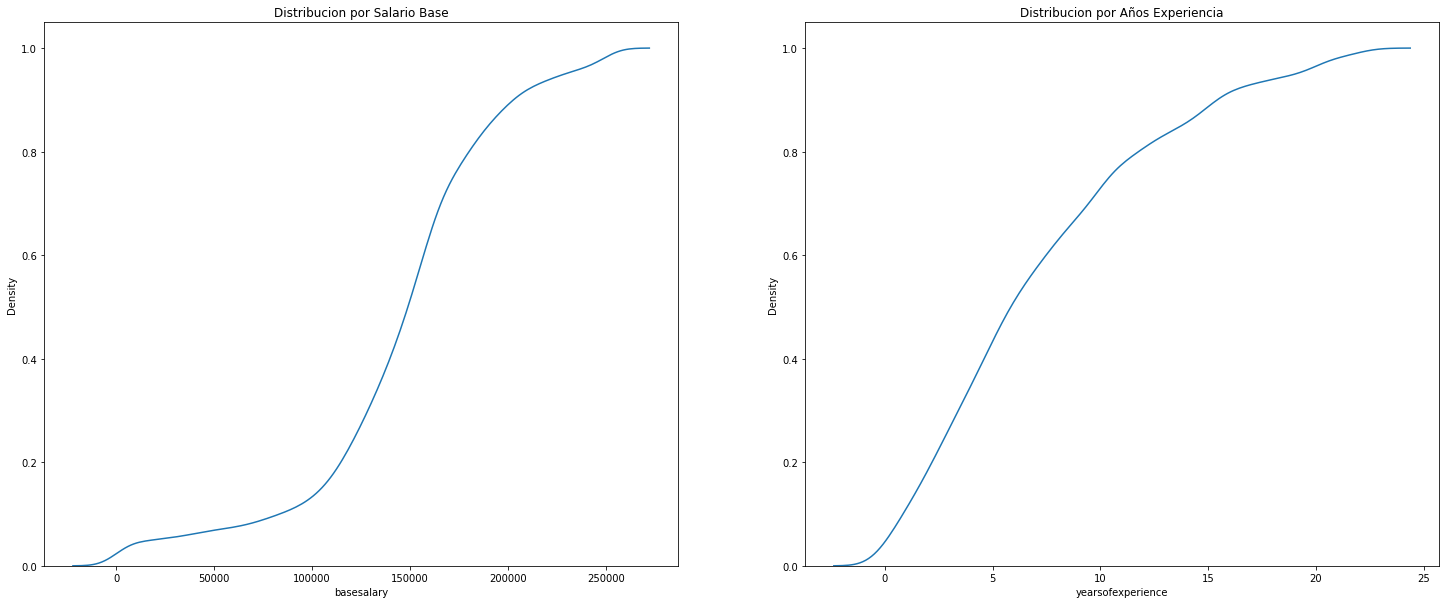

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='basesalary',cumulative=True )
plt.title('Distribucion por Salario Base')

plt.subplot(1,2,2)
sns.kdeplot(data=df, x='yearsofexperience',cumulative=True )
plt.title('Distribucion por Años Experiencia')

plt.show()

En este gráfico se aprecia un aumento acumulativo de la base salarial en los últimos años, así como de los años de experiencia en el sector.

##2.2 Análisis de Simetría / Asimetria / Curtosis

In [ ]:
cols_screw_curt = ['basesalary', 'yearsofexperience']

for i in cols_screw_curt:
  print(i, ':')
  print('Esta distribucion tiene una Asimetría de :', df[i].skew())
  print('Esta distribucion tiene una Curtosis de :', df[i].kurt())
  print('----------------------------------------')


basesalary :
Esta distribucion tiene una Asimetría de : -0.7679735524915436
Esta distribucion tiene una Curtosis de : 1.349047699052746
----------------------------------------
yearsofexperience :
Esta distribucion tiene una Asimetría de : 0.8277571748771808
Esta distribucion tiene una Curtosis de : -0.05498392590084977
----------------------------------------


##2.3 Análisis de variables categóricas

 ### 2.3.1 Hallazgos sobre posiciones y compañias
 * La mayor parte de las personas encuestadas estan en posiciones de ingeniería en software, seguida por Product Managers.
 * La menor ocupación esta dada por Management Consultant y Human Resources.
 * Amazon mantiene la mayor parte de las personas encuestadas, seguido por Google, Facebook, Apple y Netflix.

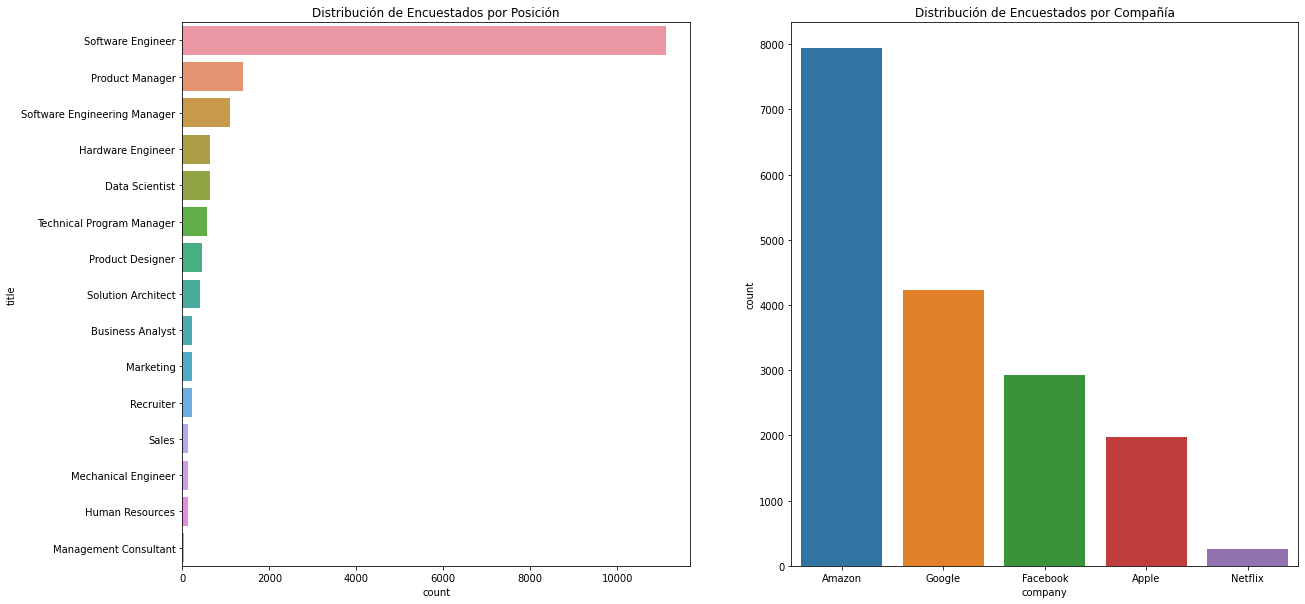

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.countplot(data=df, y = 'title', order = df['title'].value_counts().index)
plt.title('Distribución de Encuestados por Posición')

plt.subplot(1,2,2)
sns.countplot(data=df, x = 'company', order = df['company'].value_counts().index)
plt.title('Distribución de Encuestados por Compañía')

plt.show()

###2.3.2 Visualización de Variables

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


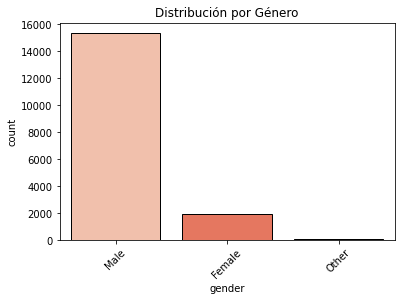

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'gender', palette="Reds",edgecolor="black")
plt.title('Distribución por Género')
plt.xticks(rotation=45);

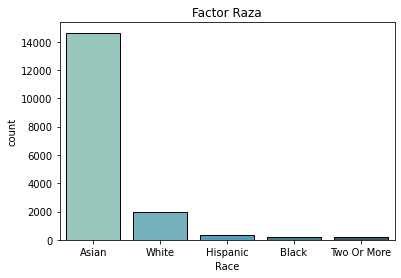

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data = df, x = 'Race', palette="GnBu_d",edgecolor="black")
plt.title('Factor Raza');
#plt.xticks(rotation=45);

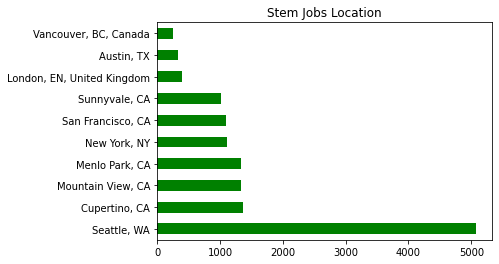

In [ ]:
plt.figure(figsize=(6,4))
df["location"].value_counts()[:10].plot.barh(title='Stem Jobs Location', color='green');

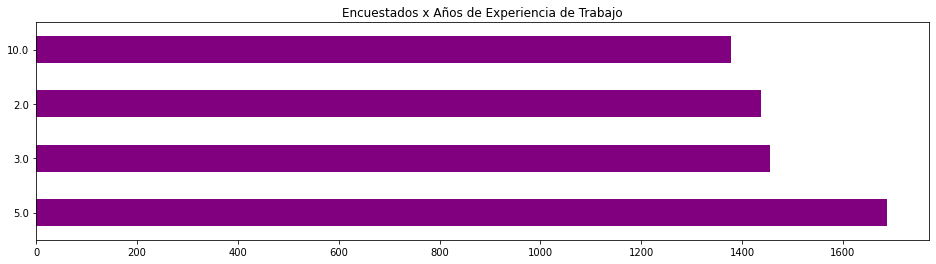

In [ ]:
plt.figure(figsize=(16,4))
df["yearsofexperience"].value_counts()[:10].plot.barh(title='Encuestados x Años de Experiencia de Trabajo', color='purple');

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

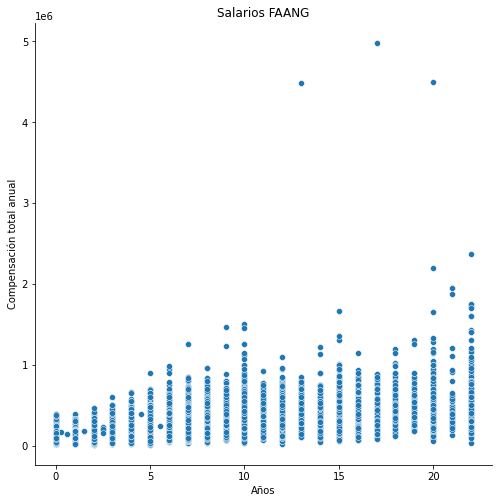

In [ ]:


plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['yearsofexperience'],y_vars=['totalyearlycompensation'],size=7,kind='scatter')
plt.xlabel('Años')
plt.ylabel('Compensación total anual')
plt.title('Salarios FAANG')
plt.show();

https://www.data-to-viz.com
https://www.youtube.com/watch?v=cfFgQxD7grY 

##2.4 Análisis Multivariable





###2.4.1 Matriz Correlación

In [ ]:
df.corr()

totalyearlycompensation  \
totalyearlycompensation                                1.000000   
yearsofexperience                                      0.505590   
yearsatcompany                                         0.317144   
basesalary                                             0.568639   
stockgrantvalue                                        0.732919   
bonus                                                  0.422423   
Race_Asian                                            -0.041798   
Race_White                                             0.020274   
Race_Two_Or_More                                      -0.004277   
Race_Black                                            -0.015002   
Race_Hispanic                                         -0.030875   
timestamp_month                                       -0.035564   
timestamp_year                                        -0.002204   
dateranking                                           -0.011040   
gender_Male                                           -0.000408   
gender_Other                                           0.012660   
gender_Title: Senior Software Engineer                      NaN   
Education_Highschool                                  -0.009964   
Education_Master's Degree                              0.023388   
Education_PhD                                          0.092698   
Education_Some College                                 0.012676   
Data Scientist                                        -0.014190   
Hardware Engineer                                     -0.002709   
Human Resources                                       -0.043116   
Management Consultant                                 -0.000669   
Marketing                                             -0.034900   
Mechanical Engineer                                   -0.015287   
Product Designer                                      -0.008737   
Product Manager                                        0.089002   
Recruiter                                             -0.072837   
Sales                                                 -0.021457   
Software Engineer                                     -0.121471   
Software Engineering Manager                           0.300181   
Solution Architect                                    -0.031671   
Technical Program Manager                             -0.011448   
US                                                     0.260796   
India                                                 -0.196430   
Canada                                                -0.099187   
United Kingdom                                        -0.070693   
Germany                                               -0.074116   
avgerage_salary                                        0.524247   
Austin, TX                                            -0.075839   
Cupertino, CA                                          0.021432   
Menlo Park, CA                                         0.170003   
Mountain View, CA                                      0.056825   
New York, NY                                          -0.005466   
Redmond, WA                                           -0.087972   
San Francisco, CA                                     -0.020784   
San Jose, CA                                          -0.071272   
Seattle, WA                                           -0.094244   
Sunnyvale, CA                                          0.003374   
company_comp                                           0.230781   
years_ratio                                           -0.002350   
rangesalary                                            0.353995   
is_faang                                                    NaN   

                                        yearsofexperience  yearsatcompany  \
totalyearlycompensation                          0.505590        0.317144   
yearsofexperience                                1.000000        0.423075   
yearsatcompany                                   0.42307

###2.4.2 Mapa de Calor clásico

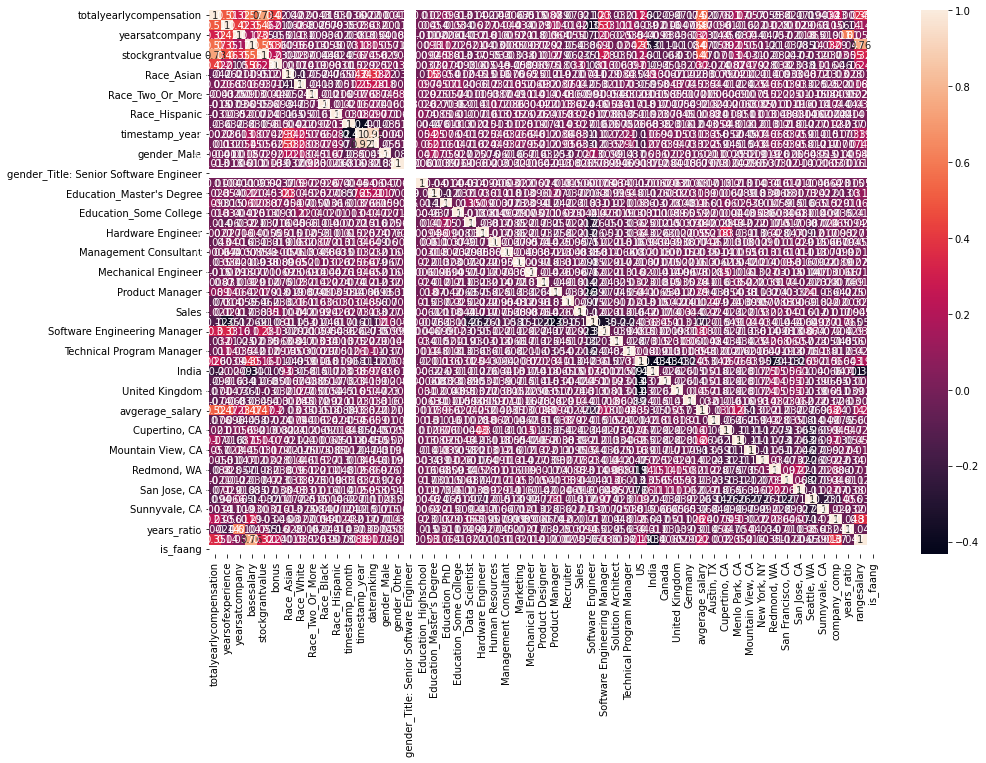

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

###2.4.3 Mapa de Calor R cuadrado

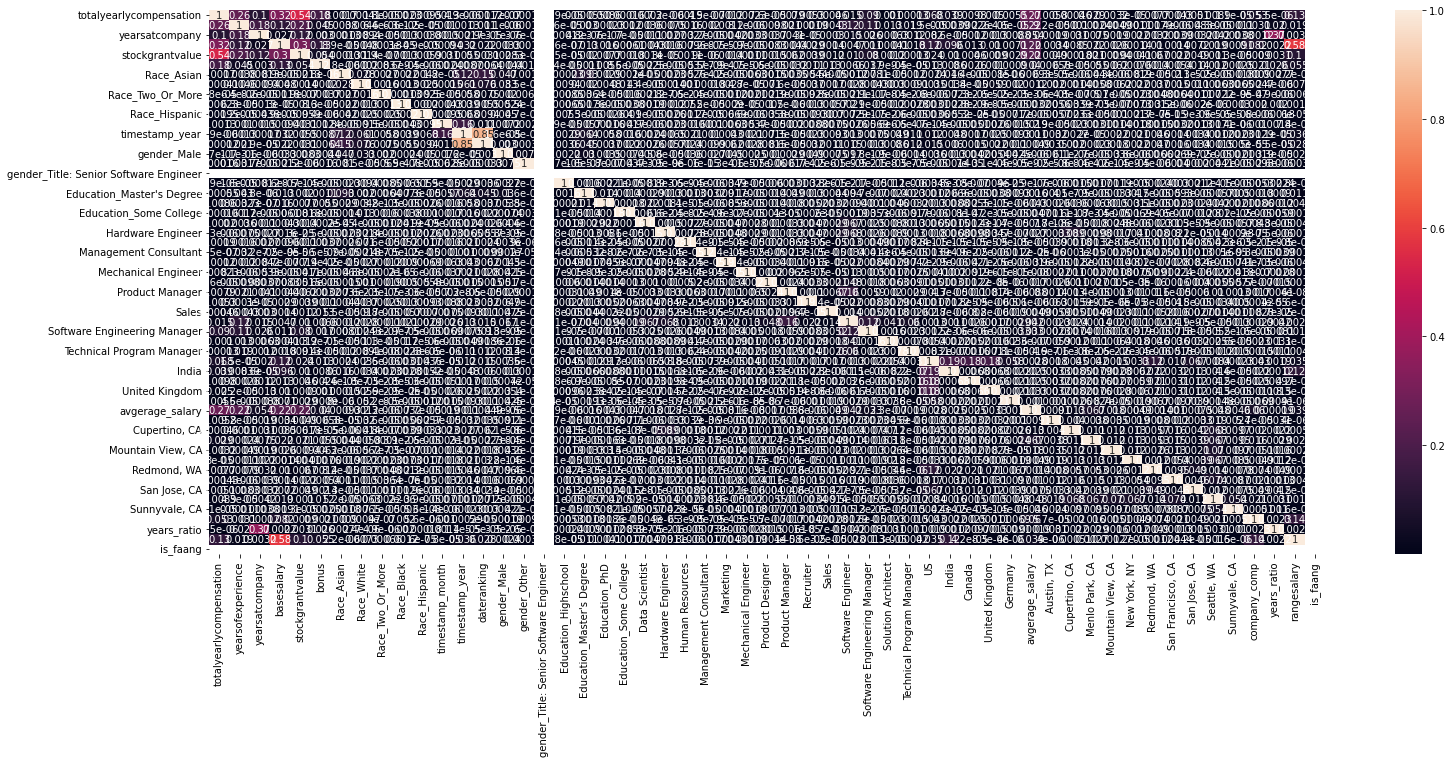

In [ ]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr()**2, annot = True)
plt.show()

###2.4.4 Diagrama de Dispersión (scatterplot)

Text(0.5, 1.0, 'Relacion entre años de experiencia y salario base')

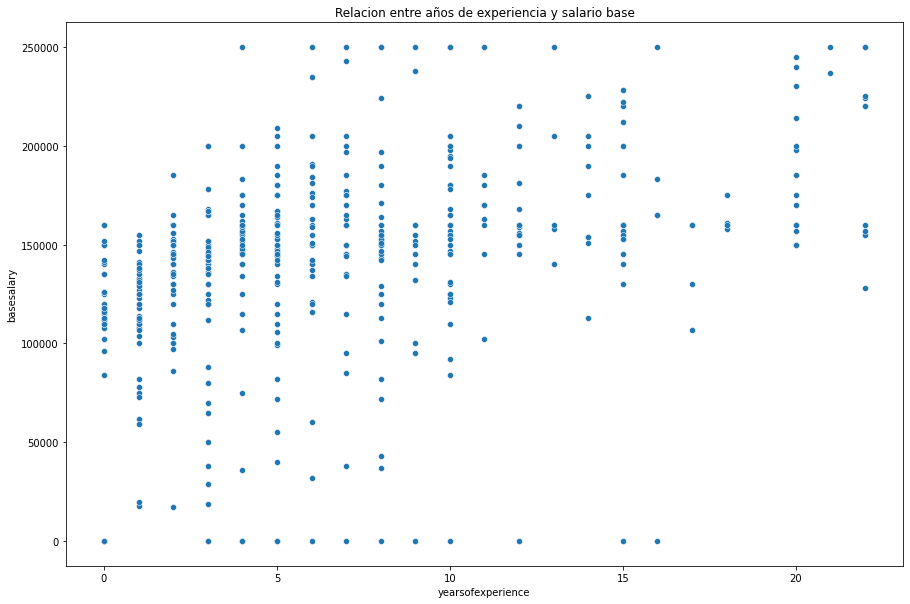

In [ ]:
plt.figure(figsize = (15,10))
sns.scatterplot(data=  df.sample(500), x='yearsofexperience', y='basesalary')
plt.title('Relacion entre años de experiencia y salario base')

###2.4.5 Diagrama de Dispersión (lmplot)

Text(0.5, 1.0, 'Relacion entre años de experiencia y salario base')

<Figure size 1080x720 with 0 Axes>

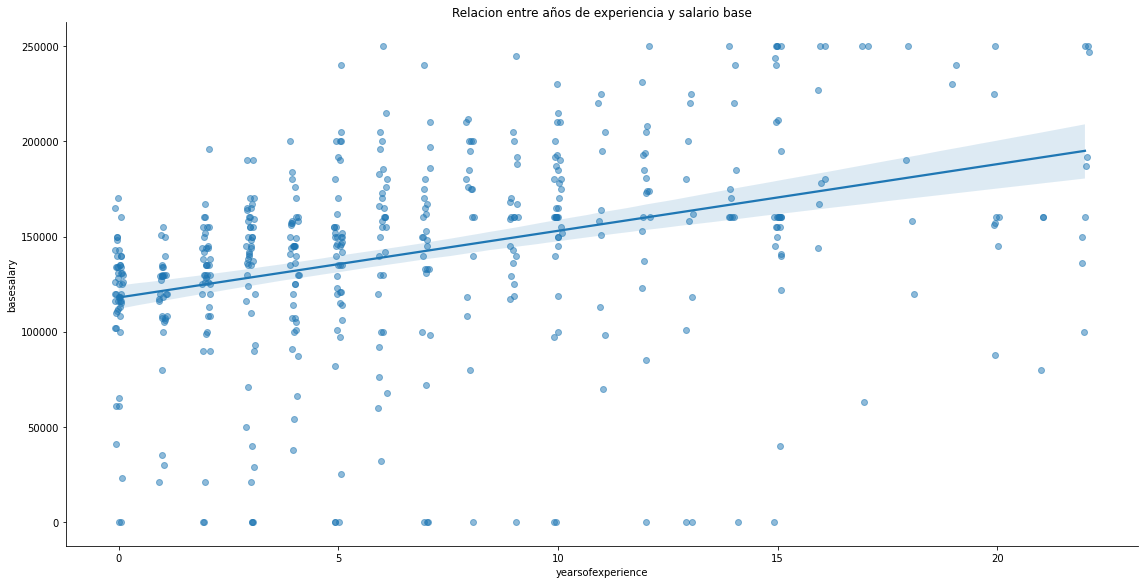

In [ ]:
plt.figure(figsize = (15,10))
sns.lmplot(data=  df.sample(500), x='yearsofexperience', y='basesalary', height=8, aspect=2, scatter_kws={'alpha':0.5}, x_jitter=0.1)
plt.title('Relacion entre años de experiencia y salario base')

###2.4.6 Diagrama de Dispersión (swarmplot)

Text(0.5, 1.0, 'Relacion entre años de experiencia y salario base')

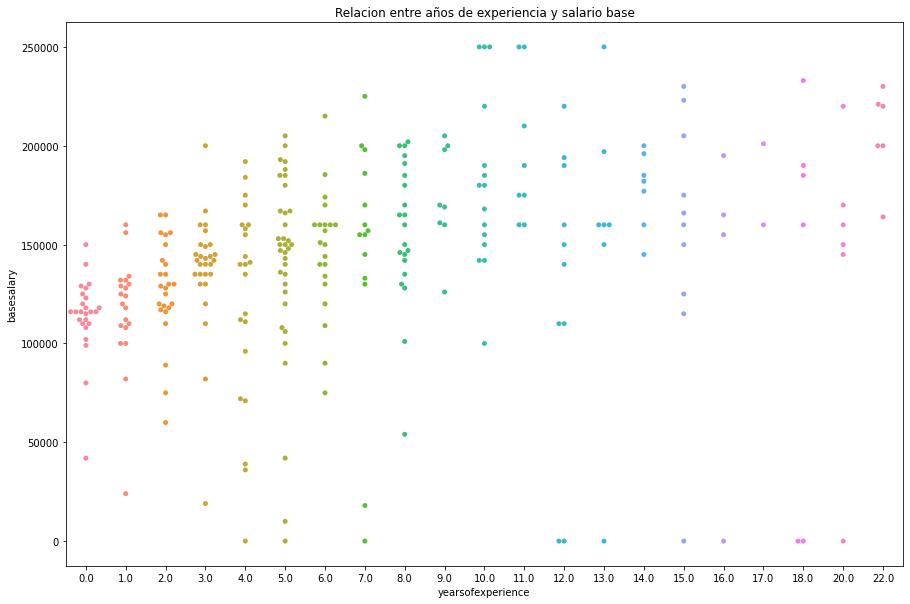

In [ ]:
plt.figure(figsize = (15,10))
sns.swarmplot(data=  df.sample(300), x='yearsofexperience', y='basesalary')
plt.title('Relacion entre años de experiencia y salario base')

###2.4.7 Distribución de Salarios por Categorias

Text(0.5, 1.0, 'Distribución de Salarios por Compañía')

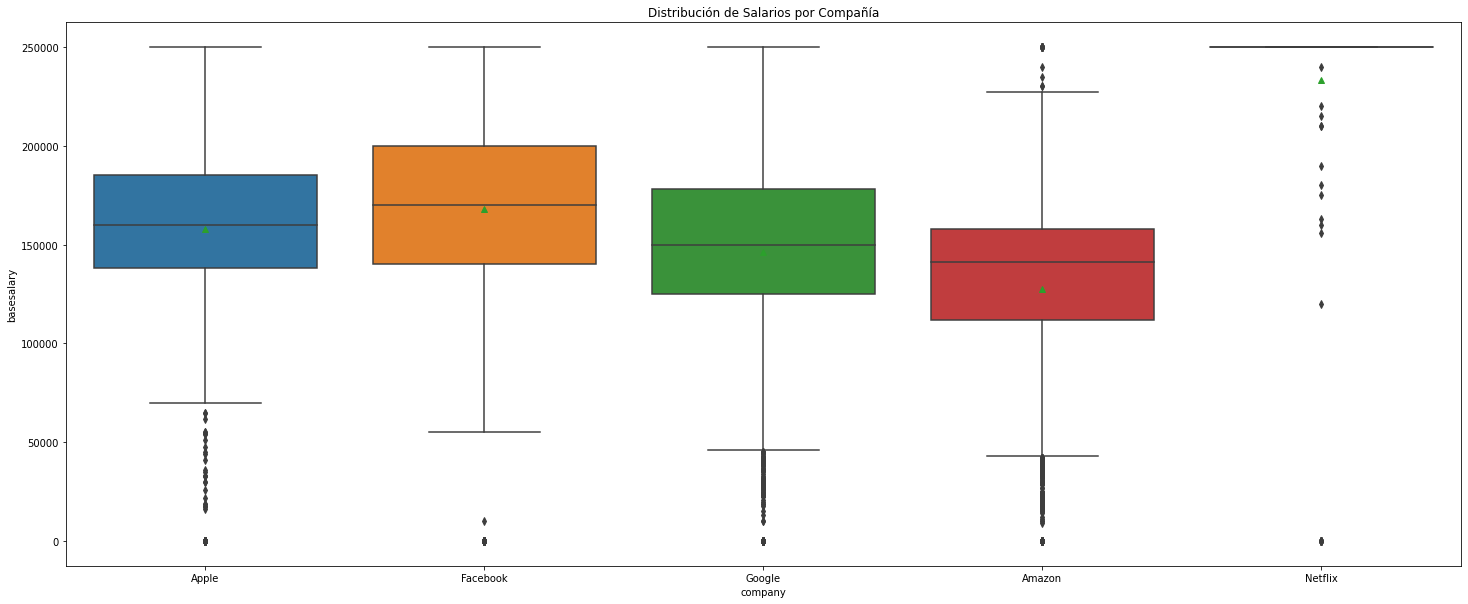

In [ ]:
plt.figure(figsize = (25,10))
sns.boxplot(data=  df, x='company', y='basesalary', showmeans=True)
plt.title('Distribución de Salarios por Compañía')

###2.4.8 Análisis de Nube de Palabras

In [ ]:
from wordcloud import WordCloud

In [ ]:
tag_words = ""
stop_words = {'nan','title'}
for i in df.tag:
  i = str(i)
  separate = i.split()
  for j in range(len(separate)):
    separate[j] = separate[j].lower()

    tag_words += " ".join(separate)+ " "


In [ ]:
tag_words

"api Development (Back-End) api development (Back-End) api development (back-end) distributed Systems (Back-End) distributed systems (Back-End) distributed systems (back-end) ios consumer ios product full Stack full stack ml / AI ml / AI ml / ai full Stack full stack ml / AI ml / AI ml / ai distributed Systems (Back-End) distributed systems (Back-End) distributed systems (back-end) distributed Systems (Back-End) distributed systems (Back-End) distributed systems (back-end) site Reliability (SRE) site reliability (SRE) site reliability (sre) site Reliability (SRE) site reliability (SRE) site reliability (sre) services distributed Systems (Back-End) distributed systems (Back-End) distributed systems (back-end) product site Reliability (SRE) site reliability (SRE) site reliability (sre) security distributed Systems (Back-End) distributed systems (Back-End) distributed systems (back-end) 3d Visual Merchandising 3d visual Merchandising 3d visual merchandising technical ios ml / AI ml / AI m

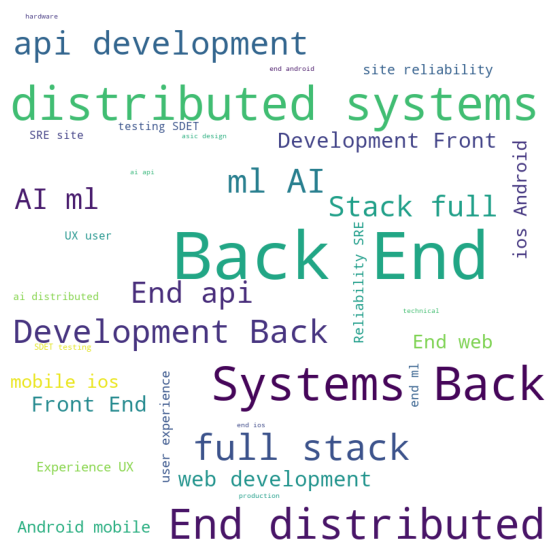

In [ ]:
wordcloud_1 = WordCloud(width = 800, height =800, background_color='white',
                        stopwords = stop_words,
                        min_font_size=10).generate(tag_words)
plt.figure(figsize =(10,10))
plt.imshow(wordcloud_1)
plt.axis('off')

plt.show()


#3. Modelo de aprendizaje (construcción y validación)

Se construye el modelo mediante los experimentos que consideramos oportunos.  Usamos los algoritmos que son necesarios para la resolución del problema.

Se elabora una estrategia de modificación de los hiper-parámetros para mejora del modelo, y elección de características (features) y etiquetas (labels) óptimas. 

Se usan las métricas que tienen más sentido sobre el problema y se elabora un análisis completo de los resultados obtenidos.

## 3.1 Modelado de Regresión Lineal LR [versión 1]

En este primer escenario y en forma básica para empezar se proyecta como variable a predecir y=basesalary con respecto a Features específicos

In [ ]:
df1=df['stockgrantvalue']

df_grp = df.groupby(["totalyearlycompensation","yearsofexperience"])[["bonus","basesalary","stockgrantvalue"]].sum().reset_index()
df_grp.head()



totalyearlycompensation  yearsofexperience   bonus  basesalary  \
0                    10000                2.0     0.0        9000   
1                    10000                5.0     0.0       10000   
2                    13000                0.0  3000.0       24000   
3                    15000                1.0     0.0       15000   
4                    15000                3.0  1000.0       10000   

   stockgrantvalue  
0           1000.0  
1              0.0  
2           2000.0  
3              0.0  
4           4000.0

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x288 with 0 Axes>

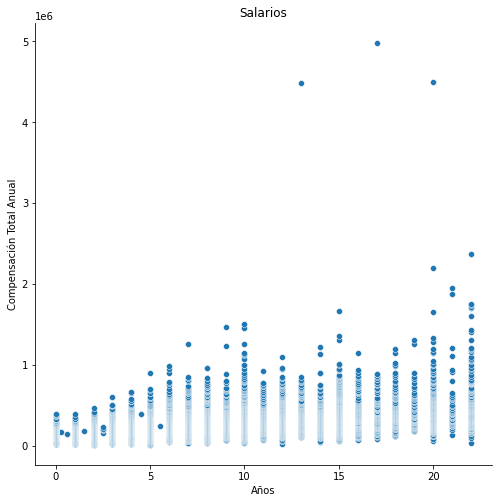

In [ ]:
plt.figure(figsize=(8,4))
sns.pairplot(df_grp,x_vars=['yearsofexperience'],y_vars=['totalyearlycompensation'],size=7,kind='scatter')
plt.xlabel('Años')
plt.ylabel('Compensación Total Anual')
plt.title('Salarios')
plt.show();

In [ ]:
X = df_grp['yearsofexperience']
X.shape
X.head()

0    2.0
1    5.0
2    0.0
3    1.0
4    3.0
Name: yearsofexperience, dtype: float64

In [ ]:
y = df_grp['basesalary']
y.shape

(5471,)

In [ ]:
# Importa Segregaciónn de datos de scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
# Separa los datos para train y test 
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)


Verificamos los tamaños:

In [ ]:
X_train.shape

(3829,)

In [ ]:
X_test.shape

(1642,)

In [ ]:
y_train.shape

(3829,)

In [ ]:
y_test.shape

(1642,)

In [ ]:
# Importando las metricas para la evaluacion del modelo
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
# Crea un nuevo eje para la columna x 
X_train = X_train[:,np.newaxis]
X_test = X_test[:,np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Importa el modelo de  Regresion Lineal de scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
# Adecuando el modelo
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Aplicando la Regresión Lineal LR
LinearRegression()

LinearRegression()

In [ ]:
# Prediciendo el Salario para los Valores TEST

y_pred = model_lr.predict(X_test)

y_pred

array([534843.59113749, 435338.96199275, 514942.66530854, ...,
       594546.36862433, 395537.11033486, 634348.22028222])

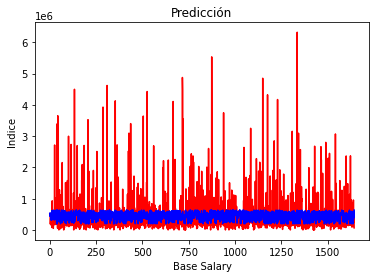

In [ ]:
# Graficando los valores Actuales y Predecidos

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Base Salary')
plt.ylabel('Indice')
plt.title('Predicción')
plt.show()

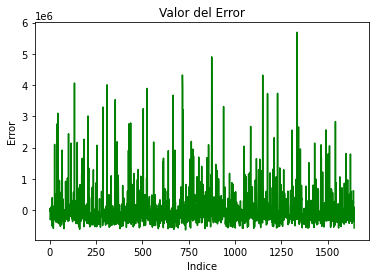

In [ ]:
# Graficando el Error

c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('Indice')
plt.ylabel('Error')
plt.title('Valor del Error')
plt.show()

In [ ]:
# calculando el MSE: Error cuadrático medio
mse = mean_squared_error(y_test,y_pred)

In [ ]:
# Calculando el puntaje R cuadrado RSQ
rsq = r2_score(y_test,y_pred)

In [ ]:
import math
print('Error cuadrático medio :',mse)
print('Puntaje R cuadrado :',rsq)
#print(math.sqrt(mse)) # BOTAR

Error cuadrático medio : 411746024842.4547
Puntaje R cuadrado : 0.02619700849039308


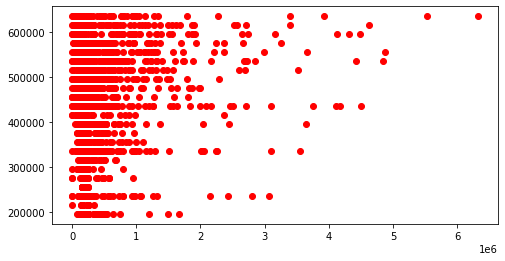

In [ ]:
# Se representan los valores reales y predichos para obtener más información
plt.figure(figsize=(8,4))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.show()

In [ ]:

# Intersección y coeficiente de línea
print('Intersección del modelo:',model_lr.intercept_)
print('Coeficiente de la línea:',model_lr.coef_)

Intersección del modelo: 634348.2202822234
Coeficiente de la línea: [-19900.92582895]


In [ ]:
#Entonces se dice que forma una recta con
#y = 634348.22 - 19900.93x


##3.2 Modelado de Regresión Lineal LR [versión 2]

A continuación se modelan con LR varios escenarios donde se combinan distintos tipos/grupos de variables para encontrar un buen índice de regresión lineal

Se proyecta como variable a predecir y=basesalary con respecto a Features agrupados en distintas combinaciones 

In [ ]:
df.dtypes


company                     object
level                       object
title                       object
totalyearlycompensation      int64
location                    object
                            ...   
Sunnyvale, CA              float64
company_comp               float64
years_ratio                float64
rangesalary                  int64
is_faang                     int64
Length: 64, dtype: object

In [ ]:
X= df[['yearsofexperience', 'yearsatcompany', 
       'stockgrantvalue', 'bonus', 'dateranking', 'gender_Male', 'gender_Other', 
       'Race_Black', 'Race_Hispanic', 'Race_Two_Or_More', 
       'Race_White', 'Education_Highschool', 'Education_Master\'s Degree',
       'Education_PhD', 'Education_Some College', 
       'Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary',
       'company_comp', 'US', 'India', 'Canada', 'United Kingdom',
       'Germany', 'Austin, TX',
       'Cupertino, CA', 'Menlo Park, CA', 'Mountain View, CA', 'New York, NY',
       'Redmond, WA', 'San Francisco, CA', 'San Jose, CA', 'Seattle, WA',
       'Sunnyvale, CA', 'company_comp', 'years_ratio', 'is_faang']]

In [ ]:
X.isna().sum()

yearsofexperience               0
yearsatcompany                  0
stockgrantvalue                 0
bonus                           0
dateranking                     0
gender_Male                     0
gender_Other                    0
Race_Black                      0
Race_Hispanic                   0
Race_Two_Or_More                0
Race_White                      0
Education_Highschool            0
Education_Master's Degree       0
Education_PhD                   0
Education_Some College          0
Data Scientist                  0
Hardware Engineer               0
Human Resources                 0
Management Consultant           0
Marketing                       0
Mechanical Engineer             0
Product Designer                0
Product Manager                 0
Recruiter                       0
Sales                           0
Software Engineer               0
Software Engineering Manager    0
Solution Architect              0
Technical Program Manager       0
avgerage_salar

In [ ]:
X = X.fillna(0)

In [ ]:
y = df.basesalary

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
ypred = model.predict(X_train)

In [ ]:
ypred

array([128388.21531242, 176007.08690722, 121422.6451014 , ...,
       132246.88247148, 120485.83294454, 165179.6985144 ])

In [ ]:
r2_score = model.score(X_test,y_test)

In [ ]:
print("Puntaje R cuadrado:", r2_score)

Puntaje R cuadrado: 0.5933071699851802


In [ ]:
from sklearn.model_selection import train_test_split
df, test_df = train_test_split(df, test_size=0.2)

In [ ]:
test_df = test_df[['timestamp_year','company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race', 'Education']]

test_df.head()

timestamp_year company    level                         title  \
28368            2019  Amazon       L5             Software Engineer   
35788            2020  Amazon      IC5               Product Manager   
35767            2021  Amazon  SDE III             Software Engineer   
28394            2019  Amazon       L5             Software Engineer   
1233             2018   Apple       M2  Software Engineering Manager   

       totalyearlycompensation                    location  yearsofexperience  \
28368                   200000                 Seattle, WA                5.0   
35788                   116000  Luxembourg, LU, Luxembourg               10.0   
35767                   304000                 Seattle, WA                9.0   
28394                   228000                 Seattle, WA                7.0   
1233                    340000               Cupertino, CA               12.0   

       yearsatcompany                             tag  basesalary  \
28368             2.5     Web Development (Front-End)      150000   
35788             1.0     Product Manager - Technical       95000   
35767             7.0  Distributed Systems (Back-End)      160000   
28394             6.0                      Full Stack      138000   
1233              4.0      API Development (Back-End)      180000   

       stockgrantvalue    bonus  gender   Race          Education  
28368          50000.0      0.0  Female  Asian    Master's Degree  
35788           4000.0  17000.0    Male  Asian    Master's Degree  
35767         144000.0      0.0    Male  Asian  Bachelor's Degree  
28394          90000.0      0.0    Male  Asian    Master's Degree  
1233          140000.0  20000.0    Male  Asian    Master's Degree

In [ ]:
df.columns


Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'timestamp_month', 'timestamp_year', 'dateranking', 'gender_Male',
       'gender_Other', 'gender_Title: Senior Software Engineer',
       'Education_Highschool', 'Education_Master's Degree', 'Education_PhD',
       'Education_Some College', 'Data Scientist', 'Hardware Engineer',
       'Human Resources', 'Management Consultant', 'Marketing',
       'Mechanical Engineer', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'country', 'US', 'India', 'Canada',
       'United Kingdom', 'Germany', 'avgerage_salary', 'Austin, TX',
       'Cupertino, CA', 'Menlo Pa

In [ ]:
#Features desagregados por Position,Experience y Location

data1x = df[['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'US', 'India', 'Canada', 'United Kingdom',
       'Germany', 'years_ratio', 'is_faang']]
#data1y = df['basesalary']
data1y = df['rangesalary']
data1x = data1x.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(data1x,data1y, test_size=0.3, random_state=42)
from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
data1_pred = model.predict(X_train)
r2_score = model.score(X_test,y_test)
print("Puntaje R cuadrado:", r2_score)


Puntaje R cuadrado: 0.15567230007193722


In [ ]:
#Features desagregados por Position, Experience, Location y company
data1x = df[['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'US', 'India', 'Canada', 'United Kingdom',
       'Germany','years_ratio', 'is_faang','company_comp']]
data1y = df['basesalary']
data1x = data1x.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(data1x,data1y, test_size=0.3, random_state=42)
from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
data1_pred = model.predict(X_train)
r2_score = model.score(X_test,y_test)
r2_score

0.4410546931513839

In [ ]:
#Features desagregados por Experience, position y company
data1x = df[['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'years_ratio', 'is_faang','company_comp']]
data1y = df['basesalary']
data1x = data1x.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(data1x,data1y, test_size=0.3, random_state=42)
from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
data1_pred = model.predict(X_train)
r2_score = model.score(X_test,y_test)
r2_score

0.30856037988744633

###Modelo DT (Decision Tree)

####Selección de variables

Con los desagregados de Experiencia, posición y compañia se presenta el mejor resultado

In [ ]:
#Features desagregados por Experience, position y company
data1x = df[['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'years_ratio', 'is_faang','company_comp']]


data1y = df['basesalary']
data1x = data1x.fillna(0)



#### Particion de datos de Training y Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1x,data1y, random_state=13) 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10409, 20)
(3470, 20)
(10409,)
(3470,)


## 3.3 Modelado con Arbol de Decisión DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeModel= DecisionTreeClassifier(max_depth=3)
DecisionTreeModel.fit(X=X_train, y=y_train)
DecisionTreeClassifier(max_depth=3)


DecisionTreeClassifier(max_depth=3)

Importamos la métrica, en este caso "accuracy":

In [ ]:
from sklearn.metrics import accuracy_score

Llevamos a cabo la predicción con valores de "testing":


In [ ]:
y_predict = DecisionTreeModel.predict(X_test)


y ahora evaluamos nuestros resultados con los verdaderos, para ver que tan bueno fue nuestro modelo:

In [ ]:
dt1 = accuracy_score(y_test, y_predict)
dt1

0.11412103746397695

De la siguiente forma visualizamos el modelo DT

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

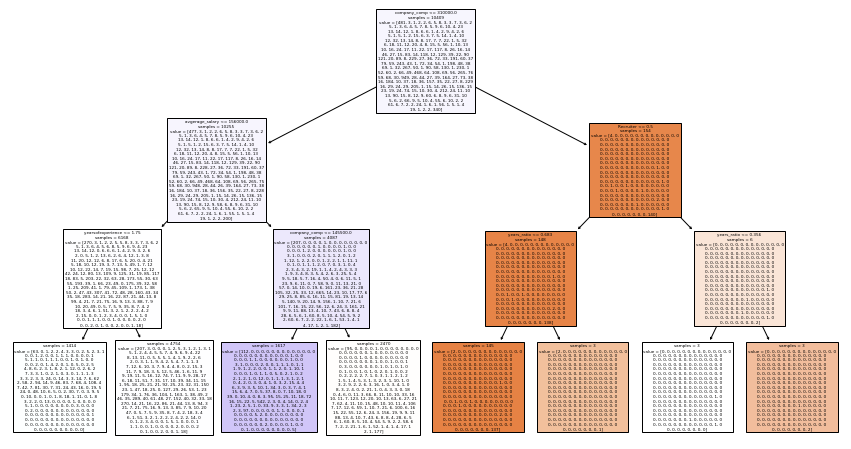

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(decision_tree=DecisionTreeModel, feature_names=data1x.columns, impurity=False, filled=True);

Calcular la prediccion

In [ ]:
a=X_test.sample()
a

Data Scientist  Hardware Engineer  Human Resources  \
33732               0                  0                0   

       Management Consultant  Marketing  Mechanical Engineer  \
33732                      0          0                    0   

       Product Designer  Product Manager  Recruiter  Sales  Software Engineer  \
33732                 0                0          0      0                  1   

       Software Engineering Manager  Solution Architect  \
33732                             0                   0   

       Technical Program Manager  avgerage_salary  yearsofexperience  \
33732                          0         136000.0                5.0   

       yearsatcompany  years_ratio  is_faang  company_comp  
33732             3.0          0.6         1      141000.0

In [ ]:
DecisionTreeModel.predict_proba(a)

array([[0.04354228, 0.00063105, 0.        , 0.        , 0.        ,
        0.00021035, 0.0004207 , 0.00105175, 0.00063105, 0.00021035,
        0.0004207 , 0.00021035, 0.00063105, 0.00021035, 0.00105175,
        0.00021035, 0.0004207 , 0.0008414 , 0.0008414 , 0.00105175,
        0.00105175, 0.00147244, 0.0008414 , 0.00189314, 0.0012621 ,
        0.00189314, 0.0008414 , 0.00462768, 0.00168279, 0.00273454,
        0.00231384, 0.        , 0.00105175, 0.00105175, 0.00105175,
        0.00021035, 0.0008414 , 0.00021035, 0.00189314, 0.0004207 ,
        0.0004207 , 0.0012621 , 0.0004207 , 0.        , 0.00063105,
        0.00021035, 0.00021035, 0.00189314, 0.0008414 , 0.0004207 ,
        0.00105175, 0.0008414 , 0.00147244, 0.00021035, 0.00021035,
        0.00063105, 0.00147244, 0.00252419, 0.0012621 , 0.00210349,
        0.00063105, 0.00147244, 0.00189314, 0.0008414 , 0.0008414 ,
        0.00168279, 0.        , 0.0004207 , 0.00315524, 0.00063105,
        0.00231384, 0.00147244, 0.00189314, 0.00

In [ ]:
y_pred = DecisionTreeModel.predict(X_train)

Interpretamos el modelo

In [ ]:
import seaborn as sns

In [ ]:
data1y.shape

(13879,)

In [ ]:
y_test.shape


(3470,)

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


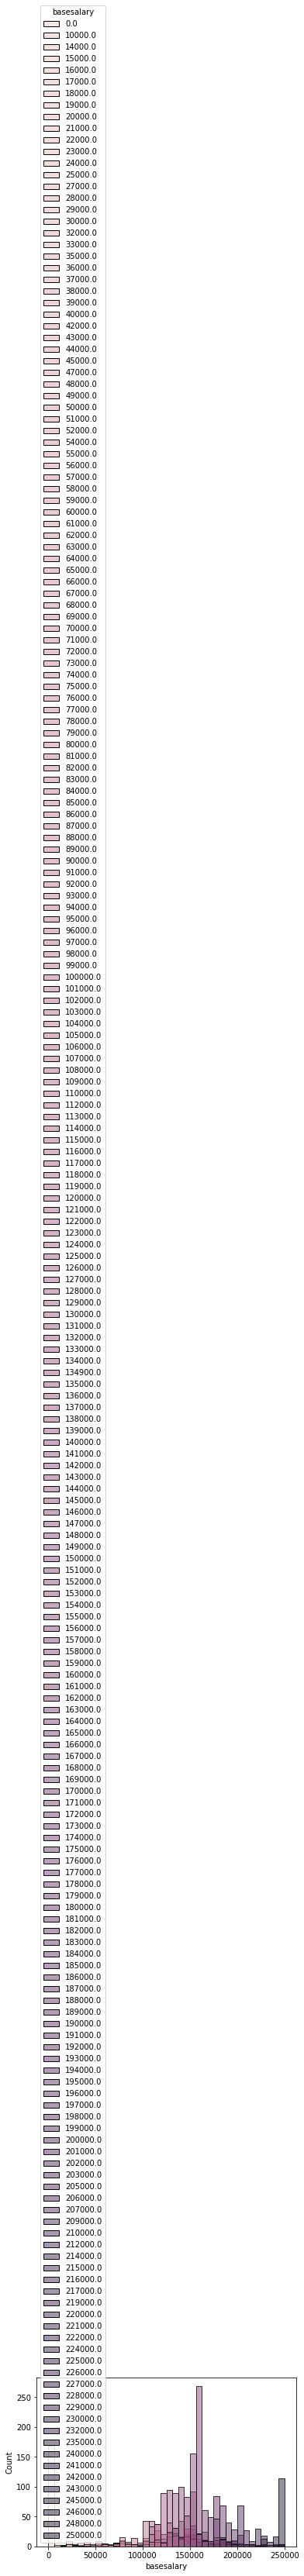

In [ ]:

sns.histplot(x=data1y, hue=y_test)



Pareciera no ser una buena estrategia! Que tal otro algoritmo?

##3.4 Modelado Random Forest (RF)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestModel = RandomForestClassifier(min_samples_leaf=3,min_samples_split=20,n_estimators=500, max_depth= None, random_state=10)
RandomForestModel.fit(X_train, y_train)
y_predict = RandomForestModel.predict(X_test)
rf = accuracy_score(y_test,y_predict)
rf


0.1634005763688761

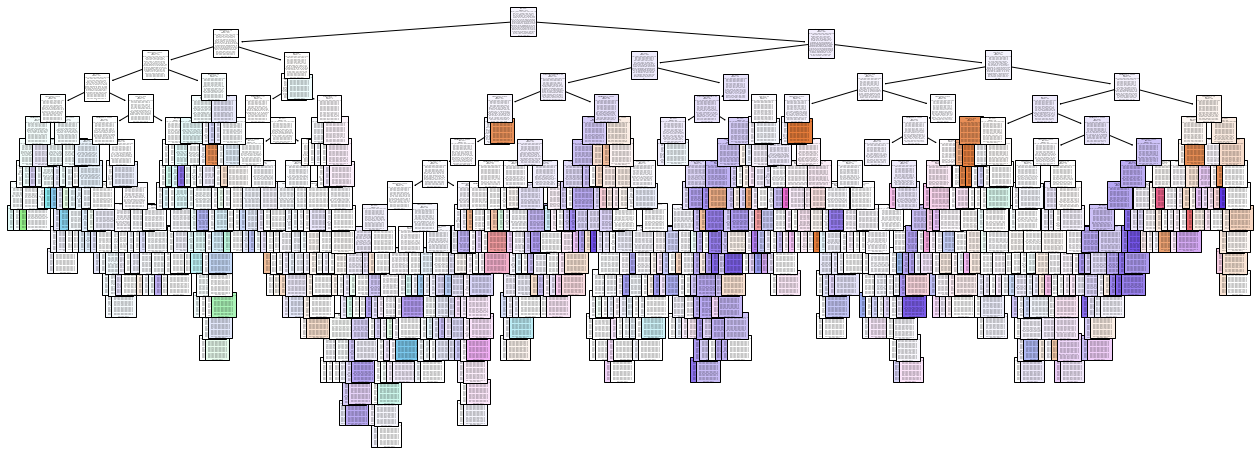

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
estimator = RandomForestModel.estimators_[0]
plt.figure(figsize=(22,8))
plot_tree(decision_tree=estimator, feature_names=data1x.columns, filled=True);





##3.5 Modelado con KNN
  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
train_preds = knn.predict(X_train)
val_preds = knn.predict(X_test)

train_score = accuracy_score(y_train, train_preds)
val_score = accuracy_score(y_test,val_preds)

print('Train score : {}'.format(train_score))
print('Validation score : {}'.format(val_score))

Train score : 0.2618887501200884
Validation score : 0.10317002881844381


# 4 Métricas 

## 4.1 Métricas de REGRESION

## 4.1.1 Configuración y entrenamiento

 Se importa la Biblioteca

In [ ]:
from sklearn import datasets
from sklearn import tree, model_selection
from sklearn.model_selection import train_test_split

 Se configuran los datos

In [ ]:
  seed = 42
  X= df[['yearsofexperience', 'yearsatcompany', 
       'stockgrantvalue', 'bonus', 'dateranking', 'gender_Male', 'gender_Other', 
       'Race_Black', 'Race_Hispanic', 'Race_Two_Or_More', 
       'Race_White', 'Education_Highschool', 'Education_Master\'s Degree',
       'Education_PhD', 'Education_Some College', 
       'Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary',
       'company_comp', 'US', 'India', 'Canada', 'United Kingdom',
       'Germany', 'Austin, TX',
       'Cupertino, CA', 'Menlo Park, CA', 'Mountain View, CA', 'New York, NY',
       'Redmond, WA', 'San Francisco, CA', 'San Jose, CA', 'Seattle, WA',
       'Sunnyvale, CA', 'company_comp', 'years_ratio', 'is_faang']]
  
  y = df.basesalary
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

  kfold = model_selection.KFold(n_splits=10, random_state=None)

Entrenando el Modelo y calculando Metricas

In [ ]:
model = tree.DecisionTreeRegressor()

##4.1.2 Error absoluto medio

In [ ]:
  scoring = "neg_mean_absolute_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print("Error absoluto medio MAE: ", results.mean()); print("Desviación Estandar: ", results.std())

Error absoluto medio MAE:  -13749.164702948348
Desviación Estandar:  889.7661470163006


## 4.1.3 Error medio cuadrado

In [ ]:
  scoring = "neg_mean_squared_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(); print("Error cuadrático medio MSE: ", results.mean()); print("Desviación Estandar: ", results.std())


Error cuadrático medio MSE:  -624495729.5911844
Desviación Estandar:  113841695.38384435


## 4.1.4 Cálculo del valor R cuadrado

In [ ]:
scoring = "r2"
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(); print("Valor R cuadrado R2: ", results.mean()); print("Desviación Estandar: ", results.std())


Valor R cuadrado R2:  0.7670211411103837
Desviación Estandar:  0.03316941741719584


## 4.1.5 Desviación cuadrática media de la raíz

In [ ]:
  import math
  scoring = "neg_root_mean_squared_error"
  results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  print(); print("Error cuadrático medio de la Raiz RMSE: ", results.mean()); print("Desviación Estandar: ", results.std())


Error cuadrático medio de la Raiz RMSE:  -25196.171804042206
Desviación Estandar:  1791.341156360818


##4.2 MÉTRICAS DE CLASIFICACION

### 4.2.1 Matriz de Confusion

In [ ]:
from sklearn.metrics import confusion_matrix
y_true = [1, 0, 0, 0, 1, 0,1]
y_pred = [1, 0, 1, 1, 1, 1,1]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

### 4.2.2 Accuracy / Exactitud

In [ ]:
from sklearn.metrics import accuracy_score
Exactitud = accuracy_score(y_true, y_pred)
print(Exactitud)

0.5714285714285714


## 4.2.3 Precisión

In [ ]:
from sklearn.metrics import precision_score
Presicion=precision_score(y_true, y_pred)
print(Presicion)

0.5


## 4.2.4 Recall / Sensibilidad

In [ ]:
from sklearn.metrics import recall_score
Sensibilidad=recall_score(y_true, y_pred)
print(Sensibilidad)

1.0


### 4.2.5 Puntaje de F1

In [ ]:
from sklearn.metrics import f1_score
Puntaje=f1_score(y_true, y_pred)
print(Puntaje)

0.6666666666666666


### 4.2.6 Curva ROC (Característica Operativa del Receptor)

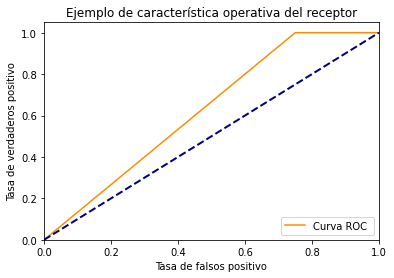

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_true = [1, 0, 0, 0, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 1]
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='Curva ROC ')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivo')
plt.ylabel('Tasa de verdaderos positivo')
plt.title('Ejemplo de característica operativa del receptor')
plt.legend(loc="lower right")
plt.show()

### 4.2.7 AUC (Area bajo la curva)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_true, y_pred)

0.625

#EXTRA ... TARGET ENCODER

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from category_encoders import TargetEncoder
TargetEncoder(cols=['basesalary'], smoothing=1.0).fit(df, df['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'years_ratio', 'is_faang','company_comp']).transform(df)


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


KeyError: ignored

In [ ]:
from category_encoders import LeaveOneOutEncoder
LeaveOneOutEncoder(cols=['basesalary']).fit(df, df['Data Scientist', 'Hardware Engineer', 'Human Resources',
       'Management Consultant', 'Marketing', 'Mechanical Engineer',
       'Product Designer', 'Product Manager', 'Recruiter', 'Sales',
       'Software Engineer', 'Software Engineering Manager',
       'Solution Architect', 'Technical Program Manager', 'avgerage_salary','yearsofexperience', 'yearsatcompany', 
       'years_ratio', 'is_faang','company_comp']).transform(df)